In [225]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [226]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("C:\\Users\\cgoss\\Downloads\\SQLiteDatabaseBrowserPortable\\Data\\HealthHack_TrainData.db")

#Get training data
obser = pd.read_sql_query("SELECT * from observations WHERE CODE='94531-1'" , con)
allergies = pd.read_sql_query("SELECT * from allergies" , con)
conditions = pd.read_sql_query("SELECT * from conditions", con)
devices = pd.read_sql_query("SELECT * from devices", con)
immunizations = pd.read_sql_query("SELECT * from immunizations", con)
patients = pd.read_sql_query("SELECT * from patients", con)

# Be sure to close the connection
con.close()

In [227]:
obser.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2020-03-10,30fb496e-b8d3-4d36-8e50-86acb3d1a223,a703222d-f88a-45ef-be97-b3636357b5bc,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),None,text
1,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),None,text
2,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),None,text
3,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Detected (qualifier value),None,text
4,2020-03-10,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,e6ad9f78-fa0e-431a-b9b6-5d127a594261,94531-1,SARS-CoV-2 RNA Pnl Resp NAA+probe,Not detected (qualifier value),None,text


In [228]:
obser.shape

(105548, 8)

In [168]:
# need to drop records that are additional tests on one patient, 
#these appear to always be a follow-up test a couple weeks after the first positive result
obser.drop_duplicates(subset='PATIENT', inplace=True)

In [229]:
obser.drop(obser[obser['VALUE'] == "Not detected (qualifier value)"].index, axis=0, inplace=True)

In [230]:
obser.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 1 to 105547
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         73697 non-null  object
 1   PATIENT      73697 non-null  object
 2   ENCOUNTER    73697 non-null  object
 3   CODE         73697 non-null  object
 4   DESCRIPTION  73697 non-null  object
 5   VALUE        73697 non-null  object
 6   UNITS        0 non-null      object
 7   TYPE         73697 non-null  object
dtypes: object(8)
memory usage: 5.1+ MB


In [231]:
obser = obser[['DATE', 'PATIENT', 'ENCOUNTER']]

In [232]:
obser.head()

,DATE,PATIENT,ENCOUNTER
1,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb
2,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22
3,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb
8,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,6faa29bc-9e80-4386-840e-b9c5ad5644ef
9,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,eed09e0e-a9ba-4623-82c7-9e28d90812bc


In [233]:
master = obser.merge(patients, how="left", left_on='PATIENT', right_on='Id')

In [234]:
master.head()

,DATE,PATIENT,ENCOUNTER,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,00bee8c8-40e5-433e-ba85-2125f133e5eb,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,None,999-21-2569,S99940488,X6135636X,Mrs.,...,Boston Massachusetts US,128 Considine Plaza Apt 21,Wakefield,Massachusetts,Middlesex County,1880.0,42.460402,-71.113293,878157.60,8128.09
1,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,08727d55-6b17-4312-9e90-1174f54b9c22,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,None,999-39-4400,S99956192,X43478634X,Mr.,...,Hamilton Massachusetts US,840 Brekke Union,Weston,Massachusetts,Middlesex County,None,42.338808,-71.341510,21147.02,0.00
2,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,630ee0a3-2bb2-434a-a7cb-b37c7f8a43cb,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,None,999-86-1503,S99937062,X73557271X,Mrs.,...,Charlton Massachusetts US,475 Cronin Manor Unit 94,Millville,Massachusetts,Worcester County,None,42.010525,-71.622337,746790.89,12704.15
3,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,6faa29bc-9e80-4386-840e-b9c5ad5644ef,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,None,999-28-9132,S99982506,X18319389X,Mr.,...,Holbrook Massachusetts US,561 Crona Byway Unit 38,Boston,Massachusetts,Suffolk County,2199.0,42.377211,-70.996938,620087.37,8129.28
4,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,eed09e0e-a9ba-4623-82c7-9e28d90812bc,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,None,999-81-6574,S99977268,X8571358X,Mrs.,...,Stoughton Massachusetts US,807 Maggio Grove,Boston,Massachusetts,Suffolk County,2134.0,42.350963,-71.133840,32286.70,1659.84


In [235]:
master.shape

(73697, 28)

In [236]:
master["ISDEAD"] = master['DEATHDATE'].notnull()
master.loc[(master.ISDEAD == True), 'ISDEAD'] = 1
master.loc[(master.ISDEAD == False), 'ISDEAD'] = 0

In [237]:
master['ISDEAD'].value_counts()

0    68129
1     5568
Name: ISDEAD, dtype: int64

In [238]:
master.drop(['Id', 'SSN', 'DRIVERS', 'PASSPORT', 'MAIDEN', 'BIRTHPLACE', 'ADDRESS', 'STATE', 'PREFIX', 'SUFFIX'], axis=1, inplace=True)

In [239]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 0 to 73696
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE                 73697 non-null  object 
 1   PATIENT              73697 non-null  object 
 2   ENCOUNTER            73697 non-null  object 
 3   BIRTHDATE            73697 non-null  object 
 4   DEATHDATE            5568 non-null   object 
 5   FIRST                73697 non-null  object 
 6   LAST                 73697 non-null  object 
 7   MARITAL              67360 non-null  object 
 8   RACE                 73697 non-null  object 
 9   ETHNICITY            73697 non-null  object 
 10  GENDER               73697 non-null  object 
 11  CITY                 73697 non-null  object 
 12  COUNTY               73697 non-null  object 
 13  ZIP                  39687 non-null  object 
 14  LAT                  73697 non-null  float64
 15  LON                  73697 non-null 

In [240]:
mould_allergy = allergies.loc[(allergies['CODE'] == 419474003)]
type(mould_allergy)
mould_allergy.head()
mould_allergy.shape

(3966, 6)

In [241]:
#merge patients that have a mould allergy into master df
master = master.merge(mould_allergy, how="left", on='PATIENT')

In [242]:
master.CODE.value_counts()

419474003.0    2884
Name: CODE, dtype: int64

In [243]:
master["CODE"] = master['CODE'].notnull()
master.loc[(master.CODE == True), 'CODE'] = 1
master.loc[(master.CODE == False), 'CODE'] = 0

In [244]:
master.rename(columns={'CODE':'HAS_MOULD_ALLERGY', 'DATE':'DATE_TESTED_POSITIVE', 'ETHNICITY':'ISHISPANIC', 'GENDER':'ISFEMALE'}, inplace = True)

In [245]:
master.drop(['ENCOUNTER_x', 'START', 'STOP', 'ENCOUNTER_y', 'DESCRIPTION'], axis=1, inplace=True)

In [246]:
# merge patients that have diabetes into master df
diabetes_patients = conditions.loc[(conditions['CODE'] == 44054006)]
#diabetes_patients.rename(columns={'CODE':'HAS_DIABETES'}, inplace=True)
print(diabetes_patients.shape)
#diabetes_patients.head()

(23686, 6)


In [247]:
master.columns

Index(['DATE_TESTED_POSITIVE', 'PATIENT', 'BIRTHDATE', 'DEATHDATE', 'FIRST',
       'LAST', 'MARITAL', 'RACE', 'ISHISPANIC', 'ISFEMALE', 'CITY', 'COUNTY',
       'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
       'ISDEAD', 'HAS_MOULD_ALLERGY'],
      dtype='object')

In [248]:
diabetes_patients.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [249]:
master = master.merge(diabetes_patients, how='left', on='PATIENT')
master.columns

Index(['DATE_TESTED_POSITIVE', 'PATIENT', 'BIRTHDATE', 'DEATHDATE', 'FIRST',
       'LAST', 'MARITAL', 'RACE', 'ISHISPANIC', 'ISFEMALE', 'CITY', 'COUNTY',
       'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
       'ISDEAD', 'HAS_MOULD_ALLERGY', 'START', 'STOP', 'ENCOUNTER', 'CODE',
       'DESCRIPTION'],
      dtype='object')

In [250]:
master.drop(['START', 'STOP', 'ENCOUNTER', 'DESCRIPTION'], axis=1, inplace=True)
master.rename(columns={'CODE':'HAS_DIABETES'}, inplace=True)

In [251]:
print(master.columns)
master.shape

Index(['DATE_TESTED_POSITIVE', 'PATIENT', 'BIRTHDATE', 'DEATHDATE', 'FIRST',
       'LAST', 'MARITAL', 'RACE', 'ISHISPANIC', 'ISFEMALE', 'CITY', 'COUNTY',
       'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
       'ISDEAD', 'HAS_MOULD_ALLERGY', 'HAS_DIABETES'],
      dtype='object')


(73697, 20)

In [252]:
master["HAS_DIABETES"] = master['HAS_DIABETES'].notnull()
master.loc[(master.HAS_DIABETES == True), 'HAS_DIABETES'] = 1
master.loc[(master.HAS_DIABETES == False), 'HAS_DIABETES'] = 0

In [253]:
master.shape

(73697, 20)

In [254]:
devices.DESCRIPTION.value_counts()

Hemodialysis machine  device (physical object)         14088
Implantable defibrillator  device (physical object)     5760
Mechanical ventilator (physical object)                 4210
Videolaryngoscope (physical object)                     4210
Coronary artery stent (physical object)                 3698
Implantable cardiac pacemaker (physical object)         1530
Name: DESCRIPTION, dtype: int64

In [224]:
# let's add if a patient has a device - these seem to indicate weak heart, kidney or lung?
device_patients = devices.loc[(master['PATIENT'].isin(devices['PATIENT']))]
#diabetes_patients.rename(columns={'CODE':'HAS_DIABETES'}, inplace=True)
print(device_patients.shape)
device_patients.head()

(3590, 7)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
9,2020-03-19,2020-03-25,534e1ef3-b3c7-42da-a022-fea54d6c828f,d3dc790a-ee5d-49ee-8bce-dfb4f9c9cd25,449071006,Mechanical ventilator (physical object),(01)28461652502686(11)200227(17)450313(10)6462...
14,2020-03-22,2020-03-22,534e1ef3-b3c7-42da-a022-fea54d6c828f,d3dc790a-ee5d-49ee-8bce-dfb4f9c9cd25,36965003,Hemodialysis machine device (physical object),(01)46046086160979(11)200301(17)450316(10)3766...
23,2020-03-16,2020-03-16,5158d043-8c93-4987-8fcb-5f94e7e32fa1,db16bec8-bf00-4728-996e-24c524f46bf1,36965003,Hemodialysis machine device (physical object),(01)23634455587063(11)200224(17)450310(10)5176...
36,2017-01-18,None,358b784d-cccb-421e-84af-033aecec250b,f48fd05e-dad1-4f68-8cd8-400a5b4772c7,706004007,Implantable cardiac pacemaker (physical object),(01)21352969840227(11)161228(17)420112(10)2153...
38,2005-04-01,None,e95e1cce-8950-432b-b56b-907b9e2696d7,fb49ade0-8151-4e64-975f-7edf924f5d1a,705643001,Coronary artery stent (physical object),(01)92050809527061(11)050311(17)300326(10)6368...


In [255]:
master.head(10)

,DATE_TESTED_POSITIVE,PATIENT,BIRTHDATE,DEATHDATE,FIRST,LAST,MARITAL,RACE,ISHISPANIC,ISFEMALE,CITY,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,ISDEAD,HAS_MOULD_ALLERGY,HAS_DIABETES
0,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,None,Janeth814,Beatty507,M,white,nonhispanic,F,Wakefield,Middlesex County,1880.0,42.460402,-71.113293,878157.60,8128.09,0,0,0
1,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,None,Adrian111,Blanda868,S,white,nonhispanic,M,Weston,Middlesex County,None,42.338808,-71.341510,21147.02,0.00,0,0,0
2,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,None,Peggie783,Turcotte120,M,white,nonhispanic,F,Millville,Worcester County,None,42.010525,-71.622337,746790.89,12704.15,0,0,1
3,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,None,Cecil300,Barton704,None,black,nonhispanic,M,Boston,Suffolk County,2199.0,42.377211,-70.996938,620087.37,8129.28,0,0,0
4,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,None,Shiloh191,Turner526,M,white,hispanic,F,Boston,Suffolk County,2134.0,42.350963,-71.133840,32286.70,1659.84,0,0,0
5,2020-03-06,fba0823a-d6fc-402f-a6c3-9394f54b1870,1981-04-04,None,Man114,Halvorson124,S,white,nonhispanic,M,Northampton,Hampshire County,1053.0,42.396915,-72.728120,989352.06,3135.56,0,0,0
6,2020-02-11,93ef4d47-2a1e-4af1-b792-96a6077b75e0,1984-08-14,None,Lionel365,D'Amore443,M,white,nonhispanic,M,Middleborough,Plymouth County,None,41.868198,-70.905575,823563.89,3958.76,0,0,0
7,2020-03-05,ff524e84-ef48-4c59-8e16-ff28514271a1,1998-06-17,None,Dessie725,Thiel172,None,white,nonhispanic,F,Quincy,Norfolk County,2170.0,42.315826,-71.027811,512151.27,4462.12,0,0,0
8,2020-03-12,5c6dd9dd-effb-4ba6-a059-a60579b86ee1,1976-01-27,None,Eldridge510,Wuckert783,S,asian,nonhispanic,M,Norton,Bristol County,None,41.968562,-71.206804,1077512.24,5529.52,0,0,0
9,2020-03-04,c58ae02e-235e-4db2-a9c3-6926e9c0c5fa,1954-03-19,2020-03-15,Tuan998,Schuster709,M,white,nonhispanic,M,Lynnfield,Essex County,1940.0,42.504375,-71.075393,1423163.19,8303.87,1,0,1


In [256]:
master.RACE.value_counts()

white     61959
black      6306
asian      4946
native      400
other        86
Name: RACE, dtype: int64

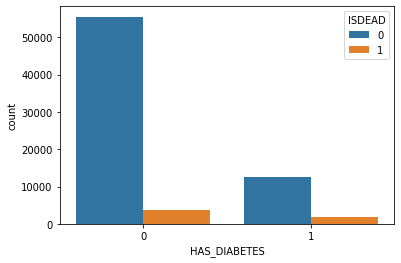

In [257]:
sns.countplot(x = 'HAS_DIABETES', hue = 'ISDEAD', data = master)

In [258]:
master.loc[(master.RACE == 'white'), 'RACE'] = 0
master.loc[(master.RACE == 'black'), 'RACE'] = 1
master.loc[(master.RACE == 'asian'), 'RACE'] = 2
master.loc[(master.RACE == 'native'), 'RACE'] = 3
master.loc[(master.RACE == 'other'), 'RACE'] = 4

In [259]:
master.loc[(master.ISFEMALE == 'M'), 'ISFEMALE'] = 0
master.loc[(master.ISFEMALE == 'F'), 'ISFEMALE'] = 1

In [260]:
master.loc[(master.ISHISPANIC == 'nonhispanic'), 'ISHISPANIC'] = 0
master.loc[(master.ISHISPANIC == 'hispanic'), 'ISHISPANIC'] = 1
master.ISHISPANIC.value_counts()

0    65420
1     8277
Name: ISHISPANIC, dtype: int64

In [261]:
master['ISFEMALE'] = pd.to_numeric(master['ISFEMALE'])
master['ISHISPANIC'] = pd.to_numeric(master['ISHISPANIC'])
master['HAS_MOULD_ALLERGY'] = pd.to_numeric(master['HAS_MOULD_ALLERGY'])
master['RACE'] = pd.to_numeric(master['RACE'])
master['ISDEAD'] = pd.to_numeric(master['ISDEAD'])
master['HAS_DIABETES'] = pd.to_numeric(master['HAS_DIABETES'])

master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73697 entries, 0 to 73696
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE_TESTED_POSITIVE  73697 non-null  object 
 1   PATIENT               73697 non-null  object 
 2   BIRTHDATE             73697 non-null  object 
 3   DEATHDATE             5568 non-null   object 
 4   FIRST                 73697 non-null  object 
 5   LAST                  73697 non-null  object 
 6   MARITAL               67360 non-null  object 
 7   RACE                  73697 non-null  int64  
 8   ISHISPANIC            73697 non-null  int64  
 9   ISFEMALE              73697 non-null  int64  
 10  CITY                  73697 non-null  object 
 11  COUNTY                73697 non-null  object 
 12  ZIP                   39687 non-null  object 
 13  LAT                   73697 non-null  float64
 14  LON                   73697 non-null  float64
 15  HEALTHCARE_EXPENSES

### Let's add age into the mix

In [262]:
master['BIRTHDATE'] = pd.to_datetime(master['BIRTHDATE'])
master['DEATHDATE'] = pd.to_datetime(master['DEATHDATE'])
master['DATE_TESTED_POSITIVE'] = pd.to_datetime(master['DATE_TESTED_POSITIVE'])

In [263]:
master['AGE_WHEN_TESTED'] = (master['DATE_TESTED_POSITIVE'] - master['BIRTHDATE']).dt.days / 365

In [264]:
master['AGE_WHEN_TESTED'] = master['AGE_WHEN_TESTED'].astype(int)

In [265]:
master.head()

,DATE_TESTED_POSITIVE,PATIENT,BIRTHDATE,DEATHDATE,FIRST,LAST,MARITAL,RACE,ISHISPANIC,ISFEMALE,...,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,ISDEAD,HAS_MOULD_ALLERGY,HAS_DIABETES,AGE_WHEN_TESTED
0,2020-03-11,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1978-06-16,NaT,Janeth814,Beatty507,M,0,0,1,...,Middlesex County,1880.0,42.460402,-71.113293,878157.60,8128.09,0,0,0,41
1,2020-02-23,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1989-09-05,NaT,Adrian111,Blanda868,S,0,0,0,...,Middlesex County,None,42.338808,-71.341510,21147.02,0.00,0,0,0,30
2,2020-03-03,90031c21-e8a4-416e-b60b-23e871ee62dc,1983-07-24,NaT,Peggie783,Turcotte120,M,0,0,1,...,Worcester County,None,42.010525,-71.622337,746790.89,12704.15,0,0,1,36
3,2020-03-10,0ac2e031-ab88-41f9-ac5d-d7d588952222,1996-02-17,NaT,Cecil300,Barton704,None,1,0,0,...,Suffolk County,2199.0,42.377211,-70.996938,620087.37,8129.28,0,0,0,24
4,2020-03-09,45138fb4-dc79-4aec-ba78-7a012d3edca7,1960-06-08,NaT,Shiloh191,Turner526,M,0,1,1,...,Suffolk County,2134.0,42.350963,-71.133840,32286.70,1659.84,0,0,0,59


In [208]:
X = master[['HAS_MOULD_ALLERGY', 'ISHISPANIC', 'ISFEMALE', 'RACE', 'AGE_WHEN_TESTED', 'HAS_DIABETES']]
y = master['ISDEAD']

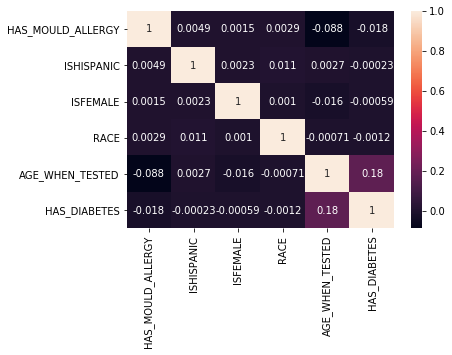

In [209]:
sns.heatmap(X.corr(), annot=True)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [211]:
X_train.head()

,HAS_MOULD_ALLERGY,ISHISPANIC,ISFEMALE,RACE,AGE_WHEN_TESTED,HAS_DIABETES
70848,0,0,0,0,36,0
12131,0,0,1,1,58,1
43562,0,0,0,0,53,1
4704,0,0,0,0,31,0
53712,1,0,0,0,41,0


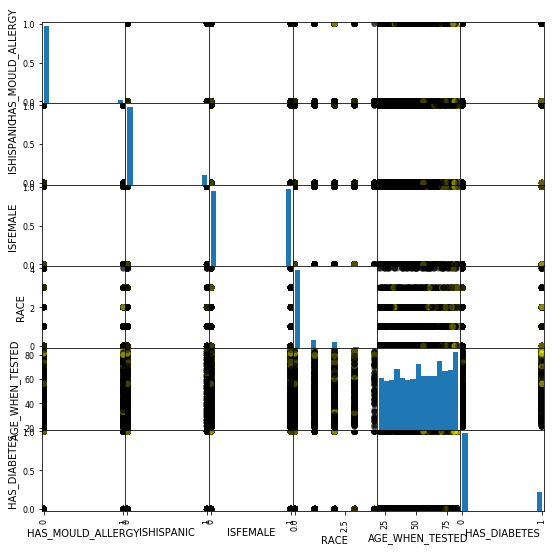

In [212]:
#from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

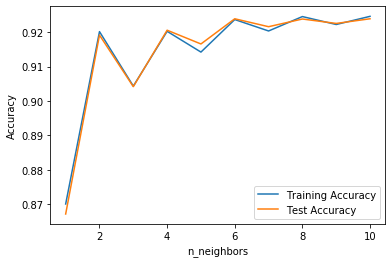

In [280]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [288]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [289]:
y_predictions = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_predictions))

Test set predictions:
 [0 0 0 ... 0 0 0]


In [290]:
print("Test set score: {:.2f}".format(np.mean(y_predictions == y_test)))

Test set score: 0.92


In [291]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.92


In [292]:
print("Actual number of patients who died: {}".format(y_test.to_numpy().sum()))
print("Predicted number of patients who died: {}".format(y_predictions.sum()))

Actual number of patients who died: 1119
Predicted number of patients who died: 14


In [286]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the resulting confusion matrix
print(confusion_matrix(y_test, y_predictions))

[[13614     7]
 [ 1114     5]]


In [287]:
accuracy = (13614+5)/(13614+12+1114)
print(str(round(accuracy, 2)))

0.92


In [273]:
# Fit a logistic regression model to our train data, by converting 'DESCRIPTION' to a dummy variable, to feed it into the model.
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
# Predict!
predictions = logisticRegression.predict(X_test)

In [279]:
pd.set_option('display.max_rows', 100)
print(predictions)


[0 0 0 ... 0 0 0]


In [83]:
round(np.mean(predictions), 2)

0.0

In [152]:
# Let's try Random Forest
from sklearn.ensemble import RandomForestClassifier

my_forest = RandomForestClassifier(random_state=1)
my_forest.fit(X_train, y_train)
predictions = my_forest.predict(X_test)
round(np.mean(predictions), 2)

0.0